# Explaining microbial scaling laws using Bayesian inference
In this project, we want to combine methods from _Statistical Physics_ and _Bayesian Data Analysis_ to elucidate the principles behind cellular growth and division. We will study various classes of individual-based growth-division models and infer individual-level processes (model structures and likely ranges of associated parameters) from sigle-cell observations. 

In the _Bayesian framework_, we formalize our process understanding the form of different rate functions, expressing the dependence of growth and division rates on variables characterizing a cell’s state (such as size and protein content), and calculate the Bayesian posteriors for the parameters of these functions.

## Group 
- [Tommaso Amico](https://github.com/tommasoamico)
- [Andrea Lazzari](https://github.com/AndreaLazzari)
- [Paolo Zinesi](https://github.com/PaoloZinesi)
- [Nicola Zomer](https://github.com/NicolaZomer)

## Growth and division processes: general model 
In our models we consider the evolution of a single non-interacting cell, which undergoes 2 processes:
- **growth:** the cell size $x(t)$ evolves according to the following equation
    $$
    \dot{x}=g(x(t)) \quad, \quad x(0)=x_b
    $$
    In some cases this relation can be expressed in vectorial form, where $\underline{x}$ is the vector of the traits characterizing the cell's state (see model 2). 
- **division:** it is ruled by the _hazard rate function_ $h(x(t))$, which represents the istantaneous probability (or, equivalently, the amount of risk) of the cell to divide. This function is related to the so called _survival function_ $s(t)$, by the relation
    $$
    \frac{\dot{s}(t)}{s(t)}=-h(t) \quad , \quad s(0)=1
    $$
    where $s(t)$ gives the probability that the cell will survive (meaning not divide in this case) past a certain time $t$. Once $s(t)$ has been computed for a given model, division times are drawn from this distribution, following the Generalized Gillespie Algorithm. 

**While the growth is a deterministic process, division is a stochastic event.** Since the cell does not generally divide into two equal parts, we introduce a parameter $frac$, which is treated as a stochastic variable, such that after the division
$$
\underline{x}_{div} = \left(frac\cdot x, (1-frac)\cdot x\right)
$$

Finally, we assume that the division ratios $frac$ are distributed according to a Beta function and that the growth rates $\omega_1$ follow a Gamma function, hence denoting by $f$ the probability density distribution we obtain
$$
\begin{aligned}
f(frac|a, b) &= Beta(a, b) \\
f(\omega_1|c, d) &= Gamma(c, d)
\end{aligned}
$$

### Solution of the differential equations
For a given model, first we solve analytically the differential equation for $x(t)$, with the initial condition $x(0)=x_b$. Then, we plug $x(t)$ into $h$ and we use $h(x(t))$ to solve the equation for $s(t)$, with initial condition $s(0)=1$.

Once $s(t)$ is known, it is possible to generate random division times from their distribution using the **inverse transform method** and the solution can be deterministically propagated to find the simulated time series $x(t)$. To do this, it is also necessary to know or draw the values of $\omega_1$ and $frac$ at each division cycle. 



# Models

## Model 0 (Linear)
**Notebook: [Real data, Model 0](./analysis_real_data/REAL_Model_0.ipynb)**

We start with a very simple stochastic model, biologically not very realistic, but useful to start familiarizing with the problem. In this first model we define $g(x)$ and $h(x)$ as 2 linear functions
$$
\begin{aligned}
g(x) &\equiv \omega_1(\mu+x) \\
h(x) &\equiv \omega_2(1+x/\nu)
\end{aligned}
$$

where $\omega_1$ and $\omega_2$ are frequencies respectively related to the *growth* and *division* phases, while $\mu$ and $\nu$ are sizes (tipycally measured in $\mu m$) that represent the lower and upper limiting trait scales, so they satisfy the relation $ \mu < \nu $.

The ratio between $\omega_1$ and $\omega_2$ is the order parameter that triggers the phase transition. The parameters $\mu$ and $\nu$ are necessary to cut off the probability distribution (in zero and for large values of $x$), which is important both for physical reasons and for making the distribution normalizable. Introducing these parameters is a mathematical trick, useful for example to prevent the cell from having a too small size, which however is difficult to justify from a biological point of view. We will then see better models, biologically speaking.

The results of the two differential equations are:
$$
\begin{aligned}
x(t) &= \left(x_b+\mu\right)e^{\omega_1 t}-\mu \\
\ln(s(t)) &= \omega_2 t \left(\frac{\mu}{\nu}-1\right) + \frac{\omega_2}{\omega_1} \left(\frac{\mu+x_b}{\nu}\right) (1-e^{\omega_1 t}) \\
s(t) &= \exp\left\{ \omega_2t \left(\frac{\mu}{\nu}-1\right) + \frac{\omega_2}{\omega_1}\left(\frac{\mu + x_b}{\nu}\right)(1-e^{\omega_1t})\right\}
\end{aligned}
$$


![img](images/s_model0.png)

## Model 1 (with Plateau)
**Notebook: [Real data, Model 1](./analysis_real_data/REAL_Model_1.ipynb)**

As in the previous model, even in this case the cell growth is governed by a single trait, which is the size. However, this model is biologically more realistic, mainly because a lower bound is placed on the size of the cell such that it can divide. 

Also in this case the processes considered are growth and division, governed by $g(x)$ and $h(x)$ respectively. In this model we define $g(x)$ and $h(x)$ as follows
$$
\begin{aligned}
g(x)&= \omega_1 x \\
h(x)&=
\begin{cases}
    0  & , \, x<\mu \\
    \omega_2 \cdot \frac{x+\nu}{\mu+\nu} & , \, x\geq \mu
\end{cases}
\end{aligned}
$$

where $g(x)$ again corresponds to an exponential growth, while $h(x)$ is lower bounded by $\mu$.

The results of the two differential equations are:
$$
\begin{aligned}
x(t) &= x_b\, e^{\omega_1 t} \\
\ln(s(t)) &= - \left[ \dfrac{x_b}{\mu+\nu} \dfrac{\omega_2}{\omega_1} \left( e^{\omega_1 t} - e^{\omega_1 t_0}\right) + \dfrac{\nu}{\mu+\nu}\, \omega_2 (t-t_0) \right] \theta(t-t_0) \\
s(t) &= \exp\left\{ - \left[ \dfrac{x_b}{\mu+\nu} \dfrac{\omega_2}{\omega_1} \left( e^{\omega_1 t} - e^{\omega_1 t_0}\right) + \dfrac{\nu}{\mu+\nu}\, \omega_2 (t-t_0) \right] \theta(t-t_0) \right\}
\end{aligned}
$$

where $t_0 \equiv \max\left\{0,\dfrac{1}{\omega_1} \ln\left(\dfrac{\mu}{x_b}\right)\right\}$ is the minimum time at which the cell can divide and $\theta(\tau)$ is the Heaviside function.

Note that this model is different from the linear one only if the new parameter $t_0$ is bigger than zero, i.e., only if $\mu > x_b$.


![img](images/s_model1.png)


## Model 2 (with Protein)
**Notebook: [Real data, Model 2](./analysis_real_data/REAL_Model_2.ipynb)**

The main difference between this model and the previous ones is that here we consider 2 traits: the cell size $m(t)$ and its protein content $p(t)$. We call $\underline{x}$ the vector
$$
\underline{x} = \begin{pmatrix} m\\ p\end{pmatrix} 
$$

As before, the traits evolution and the cell division are governed by $\underline{g}(m)$ and $h(p)$ respectively, which are defined as 
$$
\begin{aligned}
\underline{g}(m)&=\omega_1m\begin{pmatrix} 1\\ c\end{pmatrix} \\
h(p)&=
    \begin{cases}
    0   & , \, p<\mu \\
    \omega_2 \, \frac{p+\nu}{\mu+\nu} & , \, p\geq \mu
    \end{cases}
\end{aligned}
$$
From $\underline{g}(m)$ we can notice that the cell size still grows exponentially and the protein content also follows this evolution, scaled by the factor $c$. As $c$ doesn't have a real meaning, we set it to $1$. 

Moreover, in this model the condition under which the cell can divide is that it contains a minimum amount of a specific type of protein, which we call $\mu$. If $p\geq \mu$ the cell can divide, otherwise it cannot. Unlike model 1, we do not have any condition on the size of the cell for the division to take place and $h$ depens only on $p$.

The initial conditions for $m(t)$ and $p(t)$ are
$$
\begin{aligned}
    p(t=0) &= 0 \\
    m(t=0) &= m_b
\end{aligned}
$$

and the division process occurs in the following way
$$
\begin{pmatrix} m \\ p\end{pmatrix} \rightarrow \begin{pmatrix} frac \cdot m \\ 0\end{pmatrix} + \begin{pmatrix} (1-frac) \cdot m \\ 0\end{pmatrix}
$$
where $frac$ is the division ratio.

Similarly to the [Model 1](/analysis_real_data/REAL_Model_1.ipynb), the results of the two differential equations are:
$$
\begin{aligned}
m(t) &= m_b\, e^{\omega_1 t} \\
p(t) &= m_b\, \left(e^{\omega_1 t} -1 \right) \\
\ln(s(t)) &= - \left[ \dfrac{m_b}{\mu+\nu} \dfrac{\omega_2}{\omega_1} \left( e^{\omega_1 t} - e^{\omega_1 t_0}\right) + \dfrac{\nu - m_b}{\mu+\nu}\, \omega_2 (t-t_0) \right] \theta   (t-t_0) \\
%s(t) &= \exp\left\{ - \left[ \dfrac{m_b}{\mu+\nu} \dfrac{\omega_2}{\omega_1} \left.         %(e^\omega_1 t} - e^{\omega_1 t_0}\right) + \dfrac{\nu - m_b}{\mu+\nu}\, \omega_2 (t-t_0) %\right] \theta(t-t_0) \right\}
\end{aligned}
$$

where $t_0 \equiv \dfrac{1}{\omega_1} \ln\left(1 + \dfrac{\mu}{m_b}\right) $ is the minimum time at which the cell can divide and $\theta(\tau)$ is the Heaviside function.

Note that in this model $t_0$ is always bigger than zero, because the argument of the logarithm is alway bigger than one. This means that, independently on the choice of parameters, each cell has a time period in which it cannot divide because the protein has not reached yet the threshold value $\mu$.

![img](images/s_model2.png)

# Bayesian Data Analysis
For all models, the set of parameters to be inferred is 
$$
\underline{\theta} = \{\mu, \nu, \omega_2, a, b, c, d\}
$$

Applying the Bayes theorem, we can write
$$
f(\underline{\theta}|\tau, \omega_1, frac, M) \propto f(\tau, \omega_1, frac|\underline{\theta}, M)\cdot f(\underline{\theta}, M)
$$
where $M$ is the background information given by the selected model and $\tau$, $\omega_1$ and $frac$ are provided by the data. In the following likelihoods $M$ is left implicit.

Regarding the likelihood, $f(\tau, \omega_1, frac|\underline{\theta})$, applying the chain rule and exploiting the fact that $frac$ and $\omega_1$ are independent, it can be written as the product of the conditional probability density function of each random variable of interest
$$
\begin{aligned}
f(\tau, \omega_1, frac|\underline{\theta}) &=
f(\tau|\omega_1, frac, \underline{\theta}) \cdot f(\omega_1, frac|\underline{\theta}) \\
&=f(\tau|\omega_1, frac, \underline{\theta}) \cdot f(\omega_1|\underline{\theta}) \cdot f(frac|\underline{\theta})
\end{aligned}
$$ 
where the last 2 are respectively the $Gamma(c, d)$ and $Beta(a, b)$ distributions, while the former is the probability density function of division times, which depends on the selected model and it is minus the derivative of the survival function $s(t)$.

## Workflow 
- **Calibration**  
Performing Markov Chain Monte Carlo (MCMC), via the Python implementation [emcee](https://emcee.readthedocs.io/en/stable/), we find the posterior distribution of $\theta$ and the marginalized posterior of each parameter, of which we calculate the maximum, the median and the 95% credibility interval. Then, we use this results to generate a simulated time series, that can be compared with the real data, to find which model is statistically better.  

- **Validation** 
Model validation and comparison is achieved by 
- making a boxplot of the simulated and real interdivision times
- computing the overlap of the histograms of the interdivision times
- calculating the predictive density


## Methods
- **Sampling from the PDF distribution of $\tau$ with numerical inversion of the CDF**
Following the inverse transform method, to draw a division time $t_d$ from the associated distribution, we draw a random value $K$ from a uniform distribution in the interval $[0, 1]$ (i.e., we draw a "survival probability”) and solve numerically for $t_d$

$$ 
\log(s(t_d)) = \log(K)
$$

We use the library [Pyinverse](https://pypi.org/project/pynverse/) to find numerically the inverse of a function.

- **Forward propagation**
After having generated the time series of the survival times, we can forward propagate the evolution of a single cell, according to the following procedure:

1. Start with the initial size $x_b$
2. Propagate using the equation for $x(t)$ up to the first division time
3. Divide the cell size according to $frac$ 
4. Repeat the last 2 points for all division times generated, imposing as initial size of the cell the one after division and resetting the time

In point **3.**, regarding the value of $frac$, three approches can be followed:
- set $frac=0.5$ in all iterations assuming the cell always divides equally in two parts;
- draw the values of $frac$ from the associated Beta distribution;
- use the real values contained in the dataset. 

After playing with the first approach (see notebooks in folder [analysis_sim_data](./analysis_sim_data)), in order to obtain significant results and consider $frac$ as a stochastic variable, we follow the second one in the generation of the simulated time series. 

Regarding $\omega_1$, as for $frac$, at each iteration we draw a value from the associated Gamma distribution.

- **Predictive density**
To compute the predictive density, first we divide the dataset in 2 parts, one used for calibration and the other for validation. This is done randomly and several times, in order to get a more robust estimate of the predictive density. 

In the calibration part, we take the maximum a posteriori (MAP) of the posterior: $\underline{\theta}_{MAP}$. Then, at each iteration, we use the inferred values of the parameters and the validation set to calculate the predictive density: 
$$
    \mathcal{L}(\underline{\tau}^V, \underline{\omega}_1^V,\underline{f}^V | \underline{\theta}_{MAP}) =
    \prod_{cell \, cycles} 
    \mathcal{L}(\tau_i^V | \omega_{1, i}^V,f_i^V,\underline{\theta}_{MAP}) 
    \cdot \mathcal{L}(\omega_{1, i}^V | \underline{\theta}_{MAP}) 
    \cdot \mathcal{L}(f_i^V | \underline{\theta}_{MAP})
$$

Finally, we take the average of the values obtained at each iteration for each model. Given the 3 models, the best is the one with the largest value of $\mathcal{L}(\underline{\tau}^V, \underline{\omega}_1^V,\underline{f}^V | \underline{\theta}_{MAP})$.



# First Simulations
Before analyzing the real data, we prefer to carry out simulations for each model. Given a model, we set arbitrary, but meaningful, parameter values ($\omega_1=1$, $\omega_2=0.9$, $\nu=1$, $\mu=0.1$, $x_b=1$, such that $\mu \ll \nu$ and $\omega_2<\omega_1$) and we generate the time series of the cell size. As explained above, this is achieved by sampling the division times inverting $s(t)$ and deterministically propagate the evolution of the cell to find $x(t)$. To keep the simulation simple, we fix $frac=0.5$.

Then we run MCMC to perform inference on the parameters ($\omega_1, \omega_2, \mu, \nu$). In this case the results can be compared with the true value of the parameters, which are known from the simulation. 

This is mainly done to familiarize with the problem, with the Metropolis algorithm and with the [emcee](https://emcee.readthedocs.io/en/stable/) library. The resulting notebooks can be found in the folder [analysis_sim_data](./analysis_sim_data):

- [Simulated data, Model 0](./analysis_sim_data/model_0.ipynb)
- [Simulated data, Model 1](./analysis_sim_data/model_1.ipynb)
- [Simulated data, Model 2](./analysis_sim_data/model_2.ipynb)


# Real Data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, './analysis_real_data')

from Fernando_package import functions
from Fernando_package import plot_funcs

First, we import the real data and we create the following objects:
- `size`: length of the time series, i.e., the number of divisions 
- `xb_realdata`: initial size of the cell 
- `df_microbial_growth`: our dataset 

In [2]:
df_microbial_growth = pd.read_csv('/work/Microbial_Scaling_Laws/data/modified_Susman18_physical_units.csv')
xb_realdata = df_microbial_growth['length_birth'][0]

# remove first NaN
df_microbial_growth  =  df_microbial_growth[~ np.isnan(df_microbial_growth['division_ratio'])]
size = len(df_microbial_growth['generationtime'])

# check that there is only one cell in the dataset
print('Number of cells in the dataset:', df_microbial_growth['lineage_ID'].nunique()) 

# print length of the series and initial size
print('Length of the time series:', size)
print('Initial size of the cell:', round(xb_realdata, 4))

display(df_microbial_growth)



Number of cells in the dataset: 1
Length of the time series: 251
Initial size of the cell: 1.7914


,div_and_fold,fold_growth,division_ratio,added_length,generationtime,length_birth,length_final,growth_rate,lineage_ID,generation,start_time,end_time
1,1.009831,0.794984,0.456028,3.198324,0.500000,2.633655,5.831979,1.589968,15.0,1.0,1.083333,1.583333
2,0.862482,0.607893,0.469619,2.291172,0.416667,2.738808,5.029980,1.458944,15.0,2.0,1.666667,2.083333
3,1.426486,1.037370,0.505526,4.632409,0.833333,2.542786,7.175195,1.244844,15.0,3.0,2.166667,3.000000
4,0.729601,0.490156,0.446903,2.028413,0.333333,3.206619,5.235033,1.470468,15.0,4.0,3.083333,3.416667
5,0.887982,0.609464,0.482744,2.121432,0.416667,2.527183,4.648614,1.462714,15.0,5.0,3.500000,3.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.940427,0.590789,0.520893,2.192641,0.416667,2.722385,4.915026,1.417893,15.0,249.0,150.583333,151.000000
248,0.928602,0.604227,0.507478,2.069835,0.500000,2.494268,4.564104,1.208453,15.0,250.0,151.083333,151.583333
249,1.568073,1.046815,0.550478,4.644408,0.750000,2.512440,7.156848,1.395754,15.0,251.0,151.666667,152.416667
250,0.809727,0.481681,0.500204,2.215210,0.333333,3.579885,5.795095,1.445043,15.0,252.0,152.500000,152.833333


In [3]:
fig = plot_funcs.plot_3d_interactive(df_microbial_growth)
fig.show()

|                       |        |
|:------------------------------------:|:----------------------------------:|
| ![img](images/fit_beta.png) | ![img](images/fit_gamma.png) |


<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      a     </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      b     </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>        c       </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>         d         </b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			77 ± 6
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			80 ± 6
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			63.8 ± 2.6
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.021 ± 0.001
		</td>
	</tr>
</table>

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Mean of division factor     </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Variance of division factor     </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>        Mean of growing factor       </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>         Variance of growing factor         </b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.49 ± 0.03
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			(1.59 ± 0.09) * 10^{-3}
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			1.36 ± 0.08
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.029 ± 0.003
		</td>
	</tr>
</table>

## Data analysis with single models
For each model we create a Jupyter notebook, in which we run MCMC, analyze the chains, show the marginalized posterior distributions, simulate the time series using the inferred values of the parameters, compute the overlap and the predictive density. 

These notebooks are collected in the folder [analysis_real_data](./analysis_real_data):
- [Real data, Model 0](./analysis_real_data/REAL_Model_0.ipynb)
- [Real data, Model 1](./analysis_real_data/REAL_Model_1.ipynb)
- [Real data, Model 2](./analysis_real_data/REAL_Model_2.ipynb)

Finally, in the following section we retrieve the results achieved with all models, in order to perform model comparison and validation. 

# Final results


## Inference results
### Model 0

In [4]:
df_mod0 = pd.read_csv('./data/model0.csv')

df_mod0 = df_mod0.round(4).rename({0: 'PosteriorMax',
                          1: 'LowerBoundCI',
                          2: 'UpperBoundCI'})

display(df_mod0)

,omega_2,mu,nu,a,b,c,d
PosteriorMax,0.4327,0.4728,1.0452,15.4286,14.6821,30.8215,0.0453
LowerBoundCI,0.2894,0.1328,0.6895,12.4223,12.3637,26.3462,0.0396
UpperBoundCI,0.6679,0.7912,1.9139,17.5977,17.5328,35.1631,0.0530


Most probable parameters, expressed in terms of mean and variance of the two distributions.
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Mean of division factor     </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Variance of division factor     </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>        Mean of growing factor       </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>         Variance of growing factor         </b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.506
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.00805
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			1.38
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.0633
		</td>
	</tr>
</table>

In [5]:
print("mean division factor = ", df_mod0.loc["PosteriorMax",['a','b','c','d']].values[0]/(df_mod0.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod0.loc["PosteriorMax",['a','b','c','d']].values[1]))
print("variance division factor = ", (df_mod0.loc["PosteriorMax",['a','b','c','d']].values[0]*df_mod0.loc["PosteriorMax",['a','b','c','d']].values[1])/(((df_mod0.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod0.loc["PosteriorMax",['a','b','c','d']].values[1])**2)*(df_mod0.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod0.loc["PosteriorMax",['a','b','c','d']].values[1]+1)))

print("\nmean grow factor = ", df_mod0.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod0.loc["PosteriorMax",['a','b','c','d']].values[3])
print("variance grow factor = ", df_mod0.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod0.loc["PosteriorMax",['a','b','c','d']].values[3]**2)

mean division factor =  0.5123959257008306
variance division factor =  0.008030881369625867

mean grow factor =  1.39621395
variance grow factor =  0.063248491935


### Model 1

In [6]:
df_mod1 = pd.read_csv('./data/model1.csv')

df_mod1 = df_mod1.round(4).rename({0: 'PosteriorMax',
                          1: 'LowerBoundCI',
                          2: 'UpperBoundCI'})

display(df_mod1)

,omega_2,mu,nu,a,b,c,d
PosteriorMax,0.5825,0.2002,1.0380,15.1529,14.9653,29.7617,0.0447
LowerBoundCI,0.3805,0.0537,0.6311,12.5483,12.5305,26.3317,0.0395
UpperBoundCI,0.8242,0.6599,1.8777,17.6064,17.6249,35.3439,0.0529


Most probable parameters, expressed in terms of mean and variance of the two distributions.
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Mean of division factor     </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Variance of division factor     </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>        Mean of growing factor       </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>         Variance of growing factor         </b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.498
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.00811
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			1.38
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.0624
		</td>
	</tr>
</table>

In [7]:
print("mean division factor = ", df_mod1.loc["PosteriorMax",['a','b','c','d']].values[0]/(df_mod1.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod1.loc["PosteriorMax",['a','b','c','d']].values[1]))
print("variance division factor = ", (df_mod1.loc["PosteriorMax",['a','b','c','d']].values[0]*df_mod1.loc["PosteriorMax",['a','b','c','d']].values[1])/(((df_mod1.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod1.loc["PosteriorMax",['a','b','c','d']].values[1])**2)*(df_mod1.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod1.loc["PosteriorMax",['a','b','c','d']].values[1]+1)))

print("\nmean grow factor = ", df_mod1.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod1.loc["PosteriorMax",['a','b','c','d']].values[3])
print("variance grow factor = ", df_mod1.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod1.loc["PosteriorMax",['a','b','c','d']].values[3]**2)

mean division factor =  0.5031143959466369
variance division factor =  0.008033572010523985

mean grow factor =  1.33034799
variance grow factor =  0.05946655515299999


### Model 2

In [8]:
df_mod2 = pd.read_csv('./data/model2.csv')

df_mod2 = df_mod2.round(4).rename({0: 'PosteriorMax',
                          1: 'LowerBoundCI',
                          2: 'UpperBoundCI'})

display(df_mod2)

,omega_2,mu,nu,a,b,c,d
PosteriorMax,1.2434,0.5407,0.6052,15.0915,15.3455,31.5883,0.0448
LowerBoundCI,0.8190,0.1856,0.4447,12.4532,12.4721,26.3999,0.0397
UpperBoundCI,1.5312,0.5485,0.9821,17.6510,17.6678,35.1114,0.0530


Most probable parameters, expressed in terms of mean and variance of the two distributions.
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Mean of division factor     </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>      Variance of division factor     </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>   </b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>        Mean of growing factor       </b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>         Variance of growing factor         </b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.508
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.00828
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			1.40
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(0, 0, 0); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			0.0639
		</td>
	</tr>
</table>

In [9]:
print("mean division factor = ", df_mod2.loc["PosteriorMax",['a','b','c','d']].values[0]/(df_mod2.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod2.loc["PosteriorMax",['a','b','c','d']].values[1]))
print("variance division factor = ", (df_mod2.loc["PosteriorMax",['a','b','c','d']].values[0]*df_mod2.loc["PosteriorMax",['a','b','c','d']].values[1])/(((df_mod2.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod2.loc["PosteriorMax",['a','b','c','d']].values[1])**2)*(df_mod2.loc["PosteriorMax",['a','b','c','d']].values[0]+df_mod2.loc["PosteriorMax",['a','b','c','d']].values[1]+1)))

print("\nmean grow factor = ", df_mod2.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod2.loc["PosteriorMax",['a','b','c','d']].values[3])
print("variance grow factor = ", df_mod2.loc["PosteriorMax",['a','b','c','d']].values[2]*df_mod2.loc["PosteriorMax",['a','b','c','d']].values[3]**2)

mean division factor =  0.4958274468574433
variance division factor =  0.007951858949653993

mean grow factor =  1.41515584
variance grow factor =  0.063398981632


These three tables show the maximum values of the parameters obtained from the Bayesian Inference of the three different model we analyzed.
Moreover, the 95% Credibility Interval is reported for each parameter.

The diversities within the obtained values are the consequence of the structure of the various models, which in fact involve different mechanisms during the phases of cell growth and division. 

## Scatter plot of $\tau, \omega_1, frac$

In [10]:
df_scatter_start = pd.read_csv('./data/scatter3d_start.csv')
df_scatter_mod1 = pd.read_csv('./data/scatter3d_model1.csv')
df_scatter_mod2 = pd.read_csv('./data/scatter3d_model2.csv')

In [11]:
fig = plot_funcs.comparison_3d(df1 = df_microbial_growth, df2= df_scatter_start, df3=df_scatter_mod1, df4=df_scatter_mod2)
fig.show()

From the 3D Scatter Plots above and the Pairplots below, we can see that in the Real case, apart from some outliers, data are highly concentrated forming a sort of 2-dimensional manifold.

In the models analyzed, data are more widespread in space, with the exception of the Protein Model, where the parameters have "less variability": this can be the first mark that this model better describes what happens in reality. 

## Pairplots

| Real data                            | Model 0: simulation results        |
|:------------------------------------:|:----------------------------------:|
| ![img](images/pairplot_realdata.png) | ![img](images/pairplot_model0.png) |

| Model 1: simulation results          | Model 2: simulation results        |
|:------------------------------------:|:----------------------------------:|
| ![img](images/pairplot_model1.png)   | ![img](images/pairplot_model2.png) |


## Boxplot of the inter-division times

In [12]:
df_timeseries = pd.read_csv('./data/timeseries.csv')
display(df_timeseries)

,real_data,starting_model,model_1,model_2
0,0.500000,0.255787,0.236086,0.392268
1,0.416667,0.064669,0.062620,0.215794
2,0.833333,0.411319,0.422029,0.656323
3,0.333333,1.105271,1.373951,0.953599
4,0.416667,0.622227,0.796732,0.741455
...,...,...,...,...
246,0.416667,0.368738,0.482821,0.407649
247,0.500000,0.424626,0.546615,0.534430
248,0.750000,1.030097,1.389950,0.937612
249,0.333333,0.188717,0.242298,0.377916


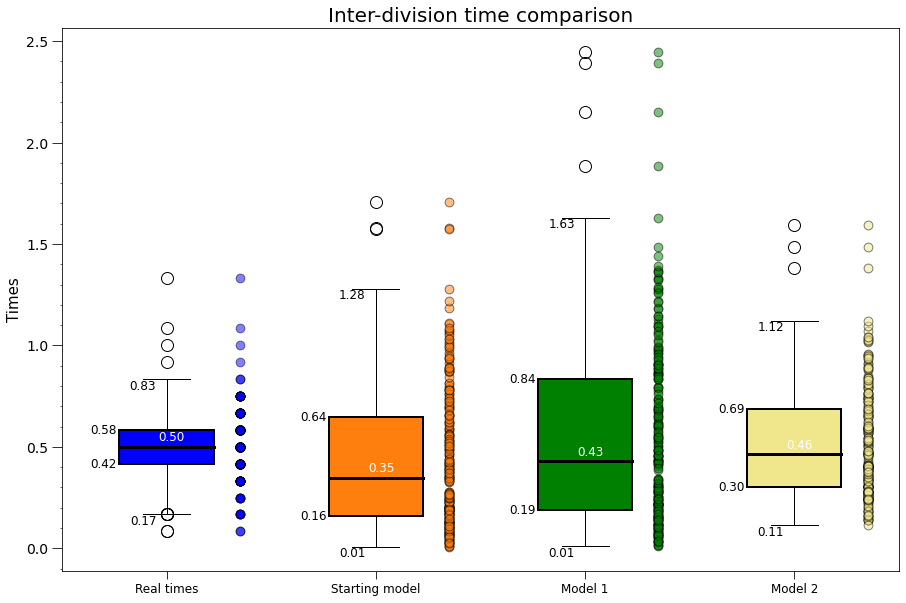

In [13]:
res = plot_funcs.boxplot(
    y=[df_timeseries.iloc[:,0], df_timeseries.iloc[:,1], df_timeseries.iloc[:,2], df_timeseries.iloc[:,3]], 
    colors=['blue', 'C1','green', 'khaki'],  
    title = 'Inter-division time comparison', 
    ylabel= 'Times', 
    xlabel='', x_font= 30, 
    labels=False 
)

fig, ax, bp = res[0], res[1], res[2]
ax.set_xticklabels(['Real times', 'Starting model', 'Model 1', 'Model 2'], fontdict={'fontsize':15})

for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] #  median line
    # overlay median value
    ax.text(x-0.2, y+0.03, '%.2f' % y,
         horizontalalignment='center', fontsize=12, color='w') # draw above, centered

for line in bp['caps']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax.text(x,y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize=12)  

for line in bp['whiskers']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax.text(x-0.3,y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center', fontsize=12) 


ax.xaxis.set_tick_params(labelsize=12, size=8)
ax.xaxis.set_tick_params(which='minor', size=4)

The Boxplot, which compares the inter-division times, again shows that the Model 2 has less variability than the other models; in addition, the median of the yellow distribution is the most similar to the one of the Real Data.

## Overlap between division time histograms

| Model 0                           |  Model 1                          |
|:---------------------------------:|:---------------------------------:|
| ![img](images/overlap_model0.png) | ![img](images/overlap_model1.png) |

| Model 2                           |
|:---------------------------------:|
| ![img](images/overlap_model2.png) |


These plots show another comparison between the inspected models and the real data.

From the values of the overlap, as we expected, the Model 2 (the Protein Model) is the one which mostly reflect the behaviour of real data, also being the most descriptive from the biological point of view. 

## Predictive density

In [14]:
df_pd = pd.read_csv('./data/pred_density.csv')
display(df_pd)


,starting_model,model_1,model_2
0,164.922736,163.270934,171.422380
1,63.726854,88.256245,99.530347
2,43.296034,45.421897,52.816637
3,51.413313,61.027721,78.442126
4,64.217955,56.165140,80.803115
5,162.100601,159.354595,174.018289
6,99.265526,81.335800,-inf
7,-23.249454,-26.784137,-0.140748
8,-329.089852,-404.975336,-342.643447
9,66.681795,55.396129,66.599394


In [15]:
print('Average Predictive Density over', df_pd.shape[0], 'cycles:')

df_pd[~np.isinf(df_pd)].mean().to_frame().transpose().rename({0: 'Predictive Density'}).round(3)

Average Predictive Density over 10 cycles:


,starting_model,model_1,model_2
Predictive Density,36.329,27.847,42.316


The predictive density is the last evidence that the Protein Model, within the various model we studied, is the best one. For this reason, it would be valuable to focus future work and analysis on models of this type, where more than a single cell trait is considered.

# Future developments
- **Use means and stds as parameters for the Gamma and Beta distributions instead of a,b,c,d** 
This choice is motivated by the fact that the latter are strongly correlated, so we expect less sharp results using the former. We already implemented this modification, the results can be found in the folder [real_data_alternative_way](./real_data_alternative_way).

- **Removal of outliers**
From the 3-dimensional scatterplot and from the pairplot of the real data it can be seen that most likely our data present outliers. According to [\[1\]](https://doi.org/10.1063/1.5141755), their origin may be due to cells in the process of division as well as errors in measurements. These outliers strongly influence the results, as can be seen from the above histograms of the interdivision times, where we observed that the simulated times try to cover also the regions characterized by them, resulting in a less sharp distribution. 

In the future it would be interesting to remove them, to reduce the noise and, hopefully, get results from the models closer to the data. This could be done following the approach presented in [\[1\]](https://doi.org/10.1063/1.5141755), aware of the risk that such data processing entails.

# References
[1] Held J, Lorimer T, Pomati F, Stoop R, Albert C. Second-order phase transition in phytoplankton trait dynamics. _Chaos_. 2020; 30(5):053109. https://doi.org/10.1063/1.5141755 

[2] Zheng, H., Bai, Y., Jiang, M. et al. General quantitative relations linking cell growth and the cell cycle in Escherichia coli. _Nature Microbiology_. 2020;  5(8):995–1001. https://doi.org/10.1038/s41564-020-0717-x 

[3] emcee documentation: https://emcee.readthedocs.io/en/stable/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=83986fd3-ecbf-4c81-9b1b-e1048abf0732' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>